````
AESM1450 - Geophysical Prospecting  -- Controlled-Source ElectroMagnetic (CSEM) Modelling
````
# 1. Marine 1D frequency domain

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
plt.style.use('ggplot')

# A short introduction to `empymod`

`empymod` calculates the electromagnetic responses of a layered medium. As such it is very fast, in comparison to the 3D modellers we are going to use later. The modeller can do many things: electric and magnetic sources and receivers, of arbitrary length and arbitrarily rotated; or loops.

However, in this course we are only going to use two very specific setups, for which we use the routine `empymod.dipole()`. The two types of surveys we consider are:
- Infinitesimal small, electric dipole sources and receivers.
- $y=0$ for source and receivers.
- Two configurations:
  - Inline (Ex source; Ex receivers) => `empymod.dipole`-input `ab=11`;
  - Broadside (Ey source; Ey receivers => `empymod.dipole`-input `ab=22`.

**=> Check the [manual of empymod](https://empymod.readthedocs.io) for more information and lots of examples. <=**


## In the following three introductory examples:
1. Single offset, many frequencies
2. Many offsets, single frequency
3. Many offsets, many frequencies

### Define model parameters for all three examples and tasks

In [3]:
# 1D depth model:
# - 1 km water
# - target at 2 km depth below seafloor, 40 m thick
depth = [0, -1000, -3000, -3040]

# Corresponding resistivity models:
res_bg = [2e14, 0.3, 1, 1, 1]      # Background model
res_tgr = [2e14, 0.3, 1, 100, 1]   # Resistive model
res_tgc = [2e14, 0.3, 1, 0.01, 1]  # Conductive model

### Define survey parameters

In [4]:
# Infinitesimal small dipole source at
# x = 0 m, y = 0 m, z = -950 m 
src = [0, 0, -950]

# Receivers: 101 receivers from x=0.5-10 km, y=0, z=-1000
off = np.arange(5, 101)*100
rec = [off, off*0, -1000]

# Field
ab = 11  # Inline (Exx)
# ab = 22  # Broadside (Eyy)

# Frequencies: 301 frequencies from 0.001-10 Hz
freq = np.logspace(-3, 1, 301)

## Example 1: single offset, many frequencies

In [5]:
# Get this receiver
ri = 45
rec1 = [rec[0][ri], rec[1][ri], rec[2]]
print(f"Offset: {rec1[0]/1e3} km")

# Calculate it
resp_bg1 = empymod.dipole(src, rec1, depth, res_bg, freq)
resp_tg1 = empymod.dipole(src, rec1, depth, res_tgr, freq)

Offset: 5.0 km

:: empymod END; runtime = 0:00:00.158188 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.253998 :: 1 kernel call(s)



<IPython.core.display.Javascript object>


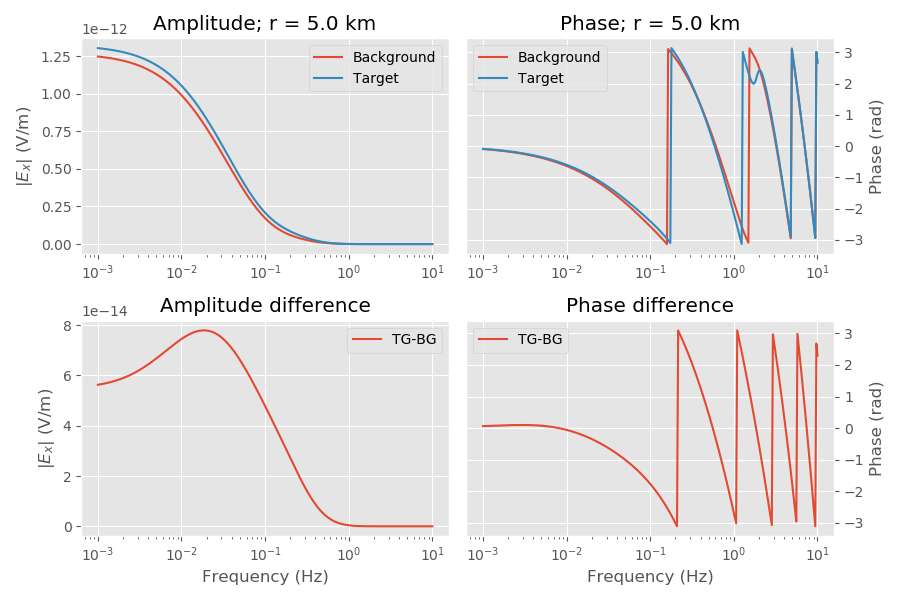

In [6]:
plt.figure(figsize=(9, 6))

ax1 = plt.subplot(221)
plt.title(f"Amplitude; r = {rec1[0][0]/1e3:.1f} km")

plt.plot(freq, resp_bg1.amp, label='Background')
plt.plot(freq, resp_tg1.amp, label='Target')

plt.legend()
plt.ylabel('$|E_x|$ (V/m)')
plt.xscale('log')

ax2 = plt.subplot(222)
plt.title(f"Phase; r = {rec1[0][0]/1e3:.1f} km")

plt.plot(freq, np.angle(resp_bg1), label='Background')
plt.plot(freq, np.angle(resp_tg1), label='Target')

plt.legend()
plt.ylabel('Phase (rad)')
plt.xscale('log')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")


ax3 = plt.subplot(223)
plt.title(f"Amplitude difference")

plt.plot(freq, (resp_tg1-resp_bg1).amp, label='TG-BG')

plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$|E_x|$ (V/m)')
plt.xscale('log')

ax4 = plt.subplot(224)
plt.title(f"Phase difference")

plt.plot(freq, np.angle(resp_tg1-resp_bg1), label='TG-BG')

plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (rad)')
plt.xscale('log')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

plt.tight_layout()
plt.show()

## Example 2: many offsets, single frequency

In [7]:
# Get this frequency
fi = 180
freq1 = freq[fi]
print(f"Frequency: {freq1:.2f} Hz")

# Calculate it
resp_bg2 = empymod.dipole(src, rec, depth, res_bg, freq1)
resp_tg2 = empymod.dipole(src, rec, depth, res_tgr, freq1)

Frequency: 0.25 Hz

:: empymod END; runtime = 0:00:00.065777 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.152739 :: 1 kernel call(s)



<IPython.core.display.Javascript object>


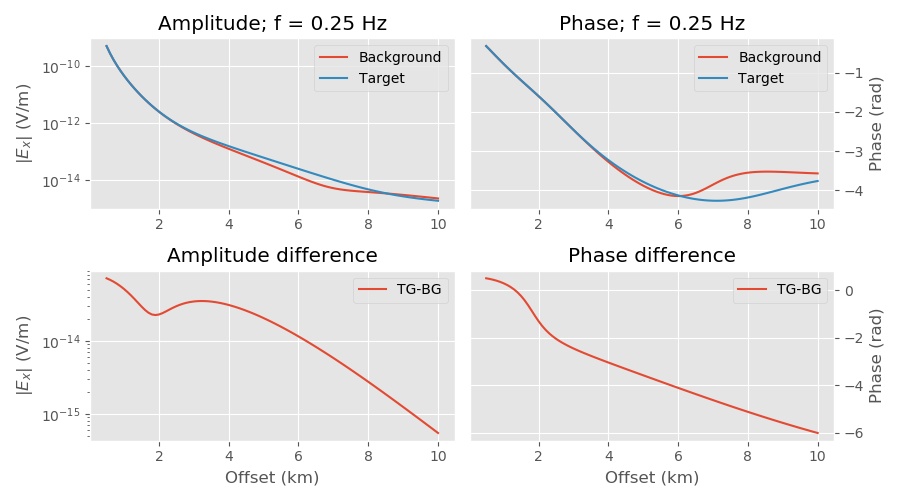

In [8]:
plt.figure(figsize=(9, 5))

ax1 = plt.subplot(221)
plt.title(f"Amplitude; f = {freq1:.2f} Hz")

plt.plot(off/1e3, resp_bg2.amp, 'C0', label='Background')
plt.plot(off/1e3, resp_tg2.amp, 'C1', label='Target')

plt.legend()
plt.ylabel('$|E_x|$ (V/m)')
plt.yscale('log')

ax2 = plt.subplot(222)
plt.title(f"Phase; f = {freq1:.2f} Hz")

plt.plot(off/1e3, np.unwrap(np.angle(resp_bg2)), 'C0', label='Background')
plt.plot(off/1e3, np.unwrap(np.angle(resp_tg2)), 'C1', label='Target')

plt.legend()
plt.ylabel('Phase (rad)')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax3 = plt.subplot(223)
plt.title(f"Amplitude difference")

plt.plot(off/1e3, (resp_tg2-resp_bg2).amp, 'C0', label='TG-BG')

plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('$|E_x|$ (V/m)')
plt.yscale('log')

ax4 = plt.subplot(224)
plt.title(f"Phase difference")

plt.plot(off/1e3, np.unwrap(np.angle(resp_tg2-resp_bg2)), 'C0', label='TG-BG')

plt.legend()
plt.xlabel('Offset (km)')
plt.ylabel('Phase (rad)')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")



plt.tight_layout()
plt.show()

## Example 3: many offsets, many frequencies

**Note**: The `htarg={'pts_per_dec': -1}` is just a flag to make it much faster (at the cost of precision, but neglectable).

In [9]:
# Calculate it
resp_bg3 = empymod.dipole(src, rec, depth, res_bg, freq, htarg={'pts_per_dec': -1})
resp_tg3 = empymod.dipole(src, rec, depth, res_tgr, freq, htarg={'pts_per_dec': -1})


:: empymod END; runtime = 0:00:00.818763 :: 301 kernel call(s)


:: empymod END; runtime = 0:00:00.541320 :: 301 kernel call(s)



<IPython.core.display.Javascript object>


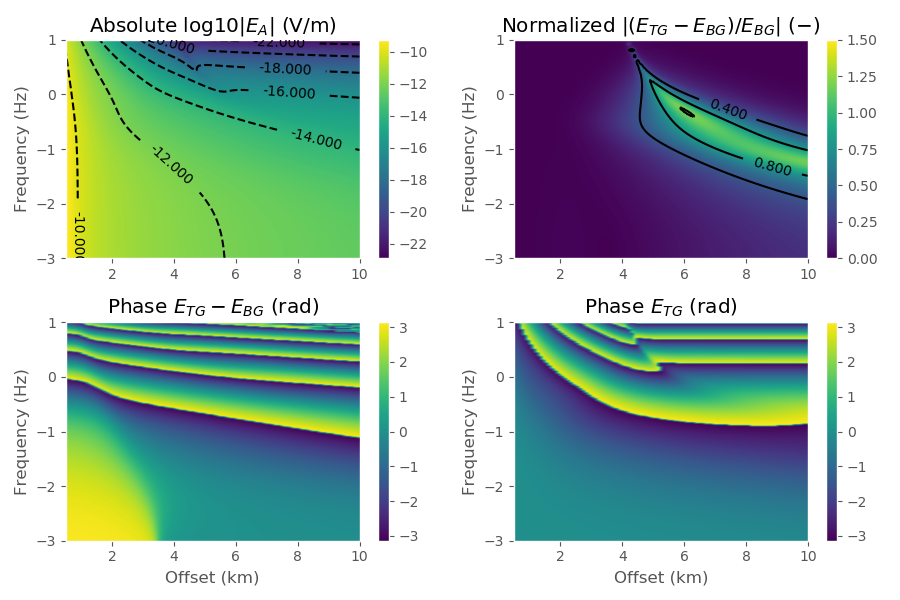

In [10]:
lfreq = np.log10(freq)

amperr = np.abs((resp_tg3-resp_bg3)/resp_bg3)
ampabs = np.log10(np.abs(resp_tg3))

phaerr = np.angle(resp_tg3-resp_bg3)
phaabs = np.angle(resp_tg3) 

# Create figure
fig = plt.figure(figsize=(9, 6), facecolor='w')
fig.subplots_adjust(wspace=.25, hspace=.4)

# Plot absolute (amplitude) in log10
ax1 = plt.subplot(222)
plt.title(r'Normalized $|(E_{TG}-E_{BG})/E_{BG}|\ (-)$')
plt.imshow(amperr, interpolation='bicubic',
           extent=[off[0]/1000, off[-1]/1000, lfreq[0], lfreq[-1]],
           origin='lower', aspect='auto', vmax=1.5)
plt.grid(False)
plt.colorbar()
CS = plt.contour(off/1000, lfreq, amperr, colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.ylim([lfreq[0], lfreq[-1]])
plt.xlim([off[0]/1000, off[-1]/1000])
plt.ylabel('Frequency (Hz)')

# Plot normalized
ax2 = plt.subplot(221)
plt.title(r'Absolute log10$|E_A|$ (V/m)')
plt.imshow(ampabs, interpolation='bicubic',
           extent=[off[0]/1000, off[-1]/1000, lfreq[0], lfreq[-1]],
           origin='lower', aspect='auto')
plt.grid(False)
plt.colorbar()
CS = plt.contour(off/1000, lfreq, ampabs, colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.ylim([lfreq[0], lfreq[-1]])
plt.xlim([off[0]/1000, off[-1]/1000])
plt.ylabel('Frequency (Hz)')


# Plot phase
ax3 = plt.subplot(223)
plt.title(r'Phase $E_{TG}-E_{BG}$ (rad)')
plt.imshow(phaerr, interpolation='bicubic',
           extent=[off[0]/1000, off[-1]/1000, lfreq[0], lfreq[-1]],
           origin='lower', aspect='auto')
plt.grid(False)
plt.colorbar()
#CS = plt.contour(off/1000, lfreq, phaerr, colors='k')
#plt.clabel(CS, inline=1, fontsize=10)
plt.ylim([lfreq[0], lfreq[-1]])
plt.xlim([off[0]/1000, off[-1]/1000])
plt.xlabel('Offset (km)')
plt.ylabel('Frequency (Hz)')

# Plot phase normalized
ax4 = plt.subplot(224)
plt.title(r'Phase $E_{TG}$ (rad)')
plt.imshow(phaabs, interpolation='bicubic',
           extent=[off[0]/1000, off[-1]/1000, lfreq[0], lfreq[-1]],
           origin='lower', aspect='auto')
plt.grid(False)
plt.colorbar()
#CS = plt.contour(off/1000, lfreq, phaabs, colors='k')
#plt.clabel(CS, inline=1, fontsize=8)
plt.ylim([lfreq[0], lfreq[-1]])
plt.xlim([off[0]/1000, off[-1]/1000])
plt.xlabel('Offset (km)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

# Tasks

In the following are three tasks:
1. Influence of (a) reservoir thickness, (b) depth, and (c) contrast
2. Influence of a thin, shallow resistor and conductor
3. Influence of the airwave


All three tasks can be analyzed for:
- Inline or crossline;
- A resistor or a conductor.

**=> So in total three tasks for four cases.**

## Task 1: Influence of (a) reservoir thickness, (b) depth, and (c) contrast

How does target thickness, target depth, and the contrast between the background and the target affect the detectability?

### Fixed:
- Water depth 1 km; water resistivity 0.3 Ohm.m.
- Background fixed at 1 Ohm.m.

### Flexible:
- Vary the target depth from 1 km to 3 km.
- Vary the target thickness from 5 m to 100 m.
- Vary the target resistivity from 1 Ohm.m to 500 Ohm.m.

### => What are your conclusions?

## Task 2: Influence of a thin, shallow resistor and conductor


### Fixed:
- Water depth 1 km; water resistivity 0.3 Ohm.m.
- Target at 2 km below seafloor, 100 Ohm.m.
- Background resistivity 1 Ohm.m.

### Flexible:
- Add a thin, shallow layer with the following characteristics:
  - Vary depth between 0 to 500 m.
  - Vary resistivity.
  - Vary thickness up to 20 m.

### => What are your conclusions?

## Task 3: Influence of the airwave

In a 1000 m water the airwave has very little influence. Reduce the airwave and find out how the airwave influences detectability.


### Fixed:
- Target at 2 km below seafloor, 100 Ohm.m.
- Background fixed at 1 Ohm.m.
- Water resistivity.

### Flexible:
- Vary the water depth from 100 m to 2 km.

### => What are your conclusions?

In [11]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Tue Feb 25 18:52:50 2020 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

             numpy : 1.17.2
             scipy : 1.3.1
           empymod : 1.10.5
           numexpr : 2.7.0
           IPython : 7.8.0
        matplotlib : 3.1.1

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------